<div align="center">
    
# ΠΑΝΕΠΙΣΤΗΜΙΟ ΚΡΗΤΗΣ
# Τμήμα Επιστήμης Υπολογιστών

## HY-215: Εφαρμοσμένα Μαθηματικά για Μηχανικούς
## Εαρινό Εξάμηνο 2022-2023
### Διδάσκοντες: Γ. Στυλιανού, Γ. Καφεντζής
    
## Ανάθεση: 7-4-2023
## Παράδοση (ηλεκτρονικά, όπως αναφέρεται στην ιστοσελίδα του μαθήματος): 
## Τρίτη, 25-4-2023, 23:59:59
<h1><center>Άσκηση 2 [Υποχρεωτική]</center></h1>

In [158]:
import numpy as np
import IPython
import matplotlib.pyplot as plt
from ctft import ctft

Ας επιστρέψουμε για αυτήν την άσκηση στη θεωρία του μετασχηματισμού Fourier. Γνωρίζετε το περίφημο πλέον ζεύγος μετασχηματισμού Fourier:
$$ A\mathrm{rect}\Big(\frac{t}{T}\Big) \longleftrightarrow AT\mathrm{sinc}(fT)$$
Από την ιδιότητα της στάθμισης στο πεδίο του χρόνου, γνωρίζετε την επιρροή του τετραγωνικού παλμού στο χώρο του χρόνου, και πως η διάρκειά του επηρεάζει το χώρο της συχνότητας. Θα ήταν ενδιαφέρον να δούμε τη σχέση αυτή αντίστροφα, δηλ. με τον τετραγωνικό παλμό στο πεδίο της συχνότητας, ο οποίος ξέρετε πλέον ότι υλοποιεί ένα ιδανικό χαμηλοπερατό φίλτρο. 

Ας θεωρήσουμε λοιπόν τον τετραγωνικό παλμό στο χώρο της συχνότητας ως:
$$H(f) = \mathrm{rect}\Big(\frac{f}{B}\Big)$$
και ας τον θεωρήσουμε ως ένα σύστημα, που μπορεί να δέχεται εισόδους και να παράγει εξόδους. Προφανώς, λόγω της ιδιότητας της δυϊκότητας, η έκφραση του συστήματος στο χώρο του χρόνου, δηλ. η $\textit{κρουστική απόκριση}$, θα είναι:
$$h(t) = B\mathrm{sinc}(Bt) $$
Όπως γνωρίζετε, ο τετραγωνικός παλμός θα λειτουργήσει ως συχνοτικό ιδανικό χαμηλοπερατό $\textit{φίλτρο}$, το οποίο θα επιτρέπει τη διέλευση των συχνοτήτων που βρίσκονται εντός του διαστήματος που είναι μη μηδενικός, και κατά συνέπεια θα αποκόπτει τις συχνότητες που θα βρίσκονται εκτός αυτού του διαστήματος. Γιατί όμως θα έχει αυτή τη συμπεριφορά? Γιατί όπως ξέρετε (ΠΛΕΟΝ), η σχέση εισόδου-εξόδου ενός συστήματος στο χώρο της συχνότητας εκφράζεται με τη σχέση του $\textit{γινομένου}$ των μετασχηματισμών Fourier της εισόδου και του συστήματος. Άρα στην περίπτωσή μας, αφού ο τετραγωνικός παλμός έχει μοναδιαίο πλάτος στο διάστημα $f \in (-B/2, B/2)$ (στη συχνότητα δηλαδή!), η έξοδος στο χώρο του μετασχηματισμού Fourier για κάθε είσοδο θα είναι:
$$ Y(f) = X(f)H(f) = \left\{\begin{array}{ll} X(f), & |f| < \frac{B}{2} \\ 0, & |f| > \frac{B}{2}. \end{array}\right.$$

Ας δοκιμάσουμε το νέο φίλτρο μας σε ένα απλο ακουστικό σήμα εισόδου.


(α') Υλοποιήστε στην Python ένα σήμα ως άθροισμα από τρία ημίτονα, με συχνότητες $f_1 = 200, f_2 = 600, f_3 = 750$ Hz, με πλάτη και φάσεις που πρέπει να επιλέξετε. Δηλ. το σήμα:
$$ x(t) = A_1\cos(2\pi f_1 t + \phi_1) + A_2\cos(2\pi f_2 t + \phi_2) + A_3\cos(2\pi f_3 t + \phi_3), $$
στο διάστημα $t \in [-1/2,1/2]$ sec. Θέστε ως παραμέτρους $A_i$ τα τρία πρώτα ψηφία του ΑΜ σας, προσθέτοντας τον αριθμό $1$ στο καθένα. 

Π.χ. αν το ΑΜ σας είναι $1367$ τότε $A_1 = 2$, $A_2 = 4$, $A_3 =7$. Για τις φάσεις, επιλέξτε κάποιο υποπολλαπλάσιο του $\pi$. Σας δίνονται οι εντολές:

In [159]:
Dt = 1e-4  # == 0.0001                                    # Βήμα στο χρόνο
t = np.arange(start=-0.5, stop=0.5+Dt, step=Dt)           # Άξονας χρόνου
Df = 1                                                    # Βήμα στη συχνότητα
f = np.arange(start=-1000, stop=1000+Df, step=Df)         # Άξονας συχνότητας

f1 = 200                                                  # πρώτη συχνότητα
f2 = 600                                                  # δεύτερη συχνότητα
f3 = 750                                                  # τρίτη συχνότητα

# Αντίστοιχα πλάτη
A1 = 6
A2 = 1
A3 = 7

# Αντίστοιχες φάσεις
phi1 = 1.57079632679 #π/2
phi2 = 0.78539816339 #π/4
phi3 = 0.39269908169 #π/8

Ας φτιάξουμε ξεχωριστά τα τρια ημίτονα.

In [160]:
x1 = A1 * np.cos(2 * np.pi * f1 * t + phi1)
IPython.display.Audio(x1, rate=1/Dt)  

In [161]:
x2 = A2 * np.cos(2 * np.pi * f2 * t + phi2)
IPython.display.Audio(x2, rate=1/Dt)  

In [162]:
x3 = A3 * np.cos(2 * np.pi * f3 * t + phi3)
IPython.display.Audio(x3, rate=1/Dt)  

Και τώρα ας τα προσθέσουμε:

In [163]:
x = x1 + x2 + x3                            # Αυτό το σήμα θα χρησιμοποιήσετε παρακάτω
IPython.display.Audio(x, rate=1/Dt)  

(β') Έχουμε καλέσει για σας τη συνάρτηση $\texttt{ctft}$ που σας δείχνει τι συμβαίνει στο χώρο της συχνότητας για ένα δοθέν σήμα. Δείτε τα τρια γραφήματα που σας επιστρέφει η συνάρτηση $\texttt{ctft}$ (την οποία κατεβάζετε από το site του μαθήματος) για το σήμα $x$. **Οι μη μηδενικές συχνότητες βρίσκονται εκεί που θεωρητικά αναμένατε? (μη λάβετε υπόψη σας το φάσμα φάσης, επικεντρωθείτε στο φάσμα πλάτους)**

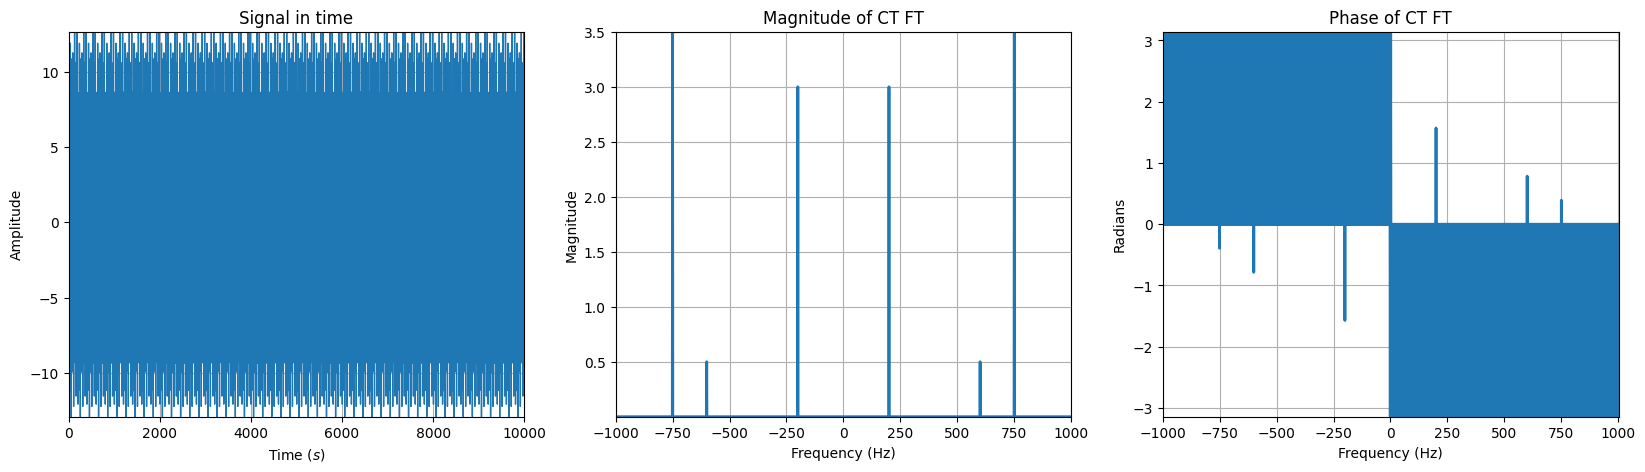

In [164]:
_ = ctft(ss=x, tt=t, ff=f, plot=True)

Γράψτε την απάντησή σας στο παρακάτω κελί.

ναι παρατηρουμε οτι οι μη μυδεκικες συχνιτητες βρησκονται εκει που της περιμεναμε δλδ στα +- 750, 600, 200 αφου αυτα ηταν τα f που δωσαμε στα cos.





(γ') Υλοποιήστε το φίλτρο σας στο χρόνο, δηλ. υλοποιήστε την κρουστική απόκριση $h(t)$. H $\texttt{NumPy}$ έχει έτοιμη συνάρτηση $\texttt{sinc}$. Για να την υλοποιήσετε, χρειάζεστε την παράμετρο $B$:

i. Βρείτε στο χαρτί και ορίστε την παράμετρο $B$ να είναι τέτοια ώστε αν δοθεί στο σύστημα η είσοδος $x$ που δημιουργήσατε παραπάνω, να μένει στην έξοδο μόνο το ημίτονο των $200$ Hz.
Εφαρμόστε το φίλτρο στο σήμα σας με χρήση της συνάρτησης $\texttt{np.convolve}$, που πραγματοποιεί τη συνέλιξη μεταξύ των δυο σημάτων που δέχεται ως όρισμα. Για σήματα συνεχούς χρόνου η συνέλιξη υλοποιείται ως $\texttt{y = Dt*np.convolve(x,h)}$. Τυπώστε τα γραφήματα της εξόδου $y$, με χρήση της $\texttt{ctft}$. 

ii. Επαναλάβατε όλα τα παραπάνω με $B$ τέτοιο ώστε να μένουν στην έξοδο μόνο τα ημίτονα των $200$ και $600$ Hz.

iii. Επαναλάβατε όλα τα παραπάνω με $B$ τέτοιο ώστε να μένουν όλα τα ημίτονα στην έξοδο.

iv. Επαναλάβατε όλα τα παραπάνω με $B$ τέτοιο ώστε να μη μένει κανένα ημίτονο στην έξοδο!



Για να εκτελέσετε τα παραπάνω, παρακάτω σας δίνεται έτοιμη η συνάρτηση $\texttt{filter\_time}$ η οποία δέχεται παραμέτρους τις οποίες πρέπει να αναγνωρίσετε, και η οποία πραγματοποιεί συνέλιξη μεταξύ ενός σήματος που της δίνετε και ενός φίλτρου $h(t)$ που κατασκευάζει από παραμέτρους που επίσης δίνετε.

In [165]:
def filter_time(B, t, dt, f, x, plot=True):
    h = B*np.sinc(B*t)                                         # το ιδανικό φίλτρο με παράμετρο Β
    y = dt*np.convolve(a=x, v=h)                               # συνέλιξη μεταξύ του φίλτρου και ενός σήματος εισόδου
    tc = np.arange(start=2*t[0], stop=2*t[-1]+dt, step=dt)     # χρειαζόμαστε νέο άξονα για το αποτέλεσμα της συνέλιξης: θυμηθείτε την ιδιότητα του εύρους της συνέλιξης
    _ = ctft(ss=y, tt=tc, ff=f, plot=plot)                     # γραφήματα
    return y

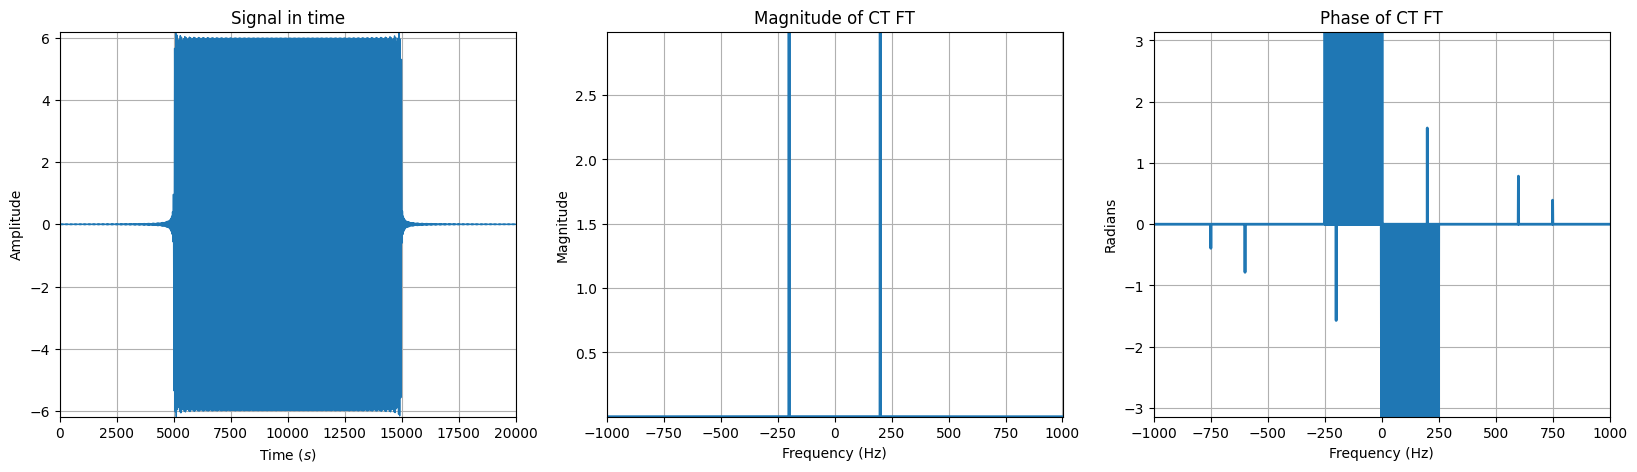

In [166]:
# (c) i. Μόνο η συχνότητα των 200Hz πρέπει να περάσει στην έξοδο
b = 500
y1 = filter_time(b, t, Dt, f, x)

Ας το ακούσουμε!

In [167]:
IPython.display.Audio(y1, rate=1/Dt)            # Ελέγξτε το ακουστικά με το σήμα x1 παραπάνω - με εξαίρεση μια αρχική σιωπή, πρέπει να σας ακούγονται το ίδιο! :)

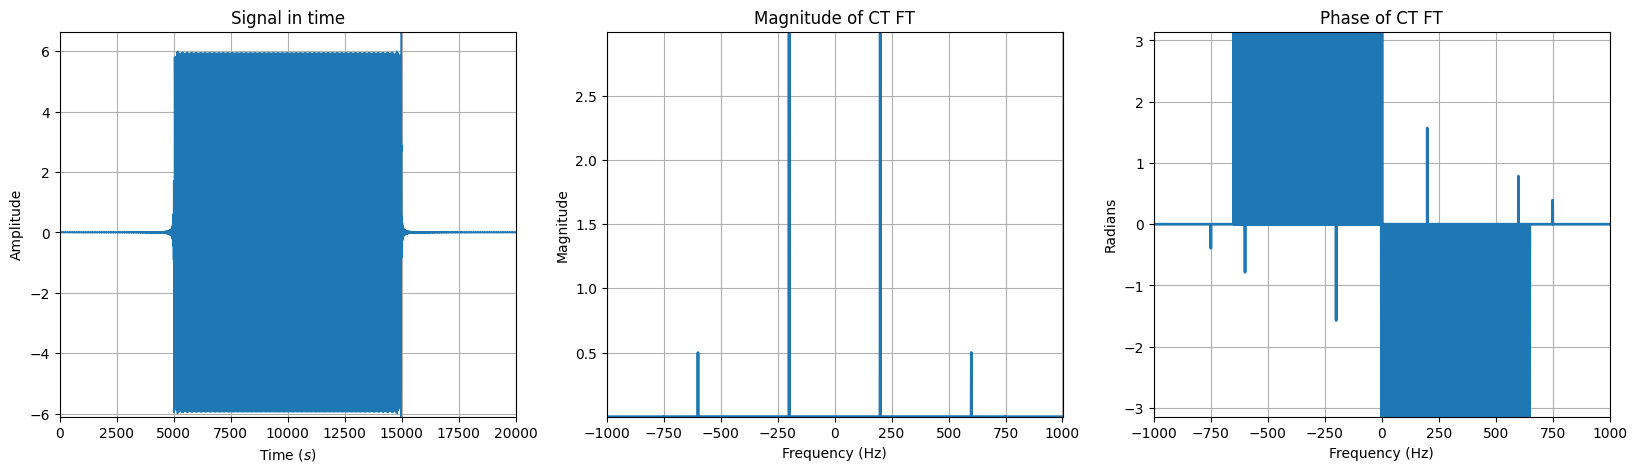

In [168]:
# (c) ii. Μόνο οι συχνότητες των 200Hz & 600Hz πρέπει να περάσουν στην έξοδο
b = 1300
y2 = filter_time(b, t, Dt, f, x)

Ας το ακούσουμε!

In [169]:
IPython.display.Audio(y2, rate=1/Dt)  

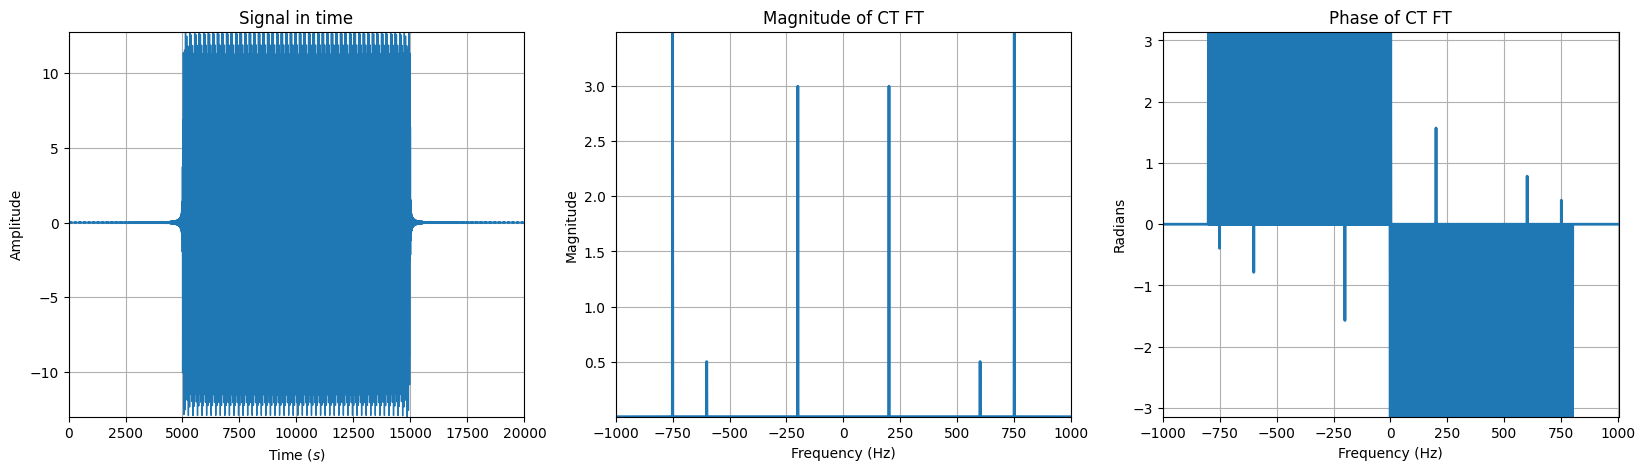

In [170]:
# (c) iii. Όλες οι συχνότητες  (200Hz, 600Hz, 750Hz) πρέπει να περάσουν στην έξοδο
b = 1600
y3 = filter_time(b, t, Dt, f, x)

Ας το ακούσουμε:

In [171]:
IPython.display.Audio(y3, rate=1/Dt)                 # με εξαίρεση την αρχική σιωπή, πρέπει να σας ακούγεται το ίδιο με το σήμα x που φτιάξατε στην αρχή της άσκησης

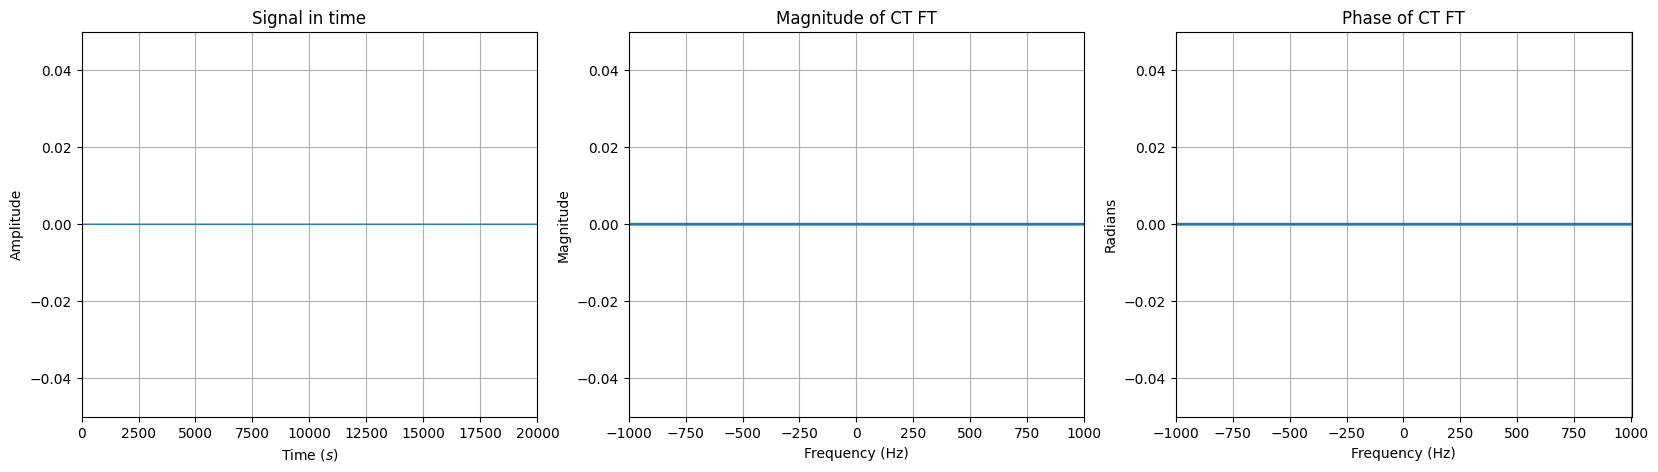

In [172]:
# (c) iv. Κανένα ημίτονο δεν πρέπει να περνά στην έξοδο!
b = 0
y4 = filter_time(b, t, Dt, f, x)

Ας το ακούσουμε!

In [173]:
IPython.display.Audio(y4, rate=1/Dt)            # Αν τα έχετε κάνει σωστά, δεν πρέπει να ακούτε τίποτα! :)

i have no idea why with b <= 399 signal pass in theory they shouldnt the only way to get silence is with b = 0 with is kind of cheating
but maybe thats thats the only way :)
i tried other values and the most silent on seams to be b = 100 but still signals pass trough so if i have done everything corectly the only
filter to cut everything is with b = 0